# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# 2. Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_disease_uci.csv to heart_disease_uci (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('heart_disease_uci.csv')  # Use exact file name
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 3. Drop irrelevant column

In [ ]:
df.drop(columns=['id', 'dataset'], inplace=True)

# 4. Handle missing values
# Numerical

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# 5. Encode categorical columns

In [ ]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# 6. Convert target to binary: 0 (no disease), 1 (disease)

In [ ]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


# 7. Split data

In [ ]:
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 8. Scale features
We use StandardScaler from sklearn.preprocessing to standardize the features before training machine learning models.
Because many ML models perform better and converge faster when input features are on a similar scale.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*9..*Logistic Regression* is a supervised machine learning algorithm used primarily for binary classification tasks — where the goal is to predict one of two possible outcomes, like:

Will a person get heart disease? → Yes (1) or No (0)

Is an email spam? → Spam (1) or Not Spam (0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🔍 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


🔍 Logistic Regression
Accuracy: 0.7717391304347826
Confusion Matrix:
 [[60 15]
 [27 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        75
           1       0.85      0.75      0.80       109

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



Manual Logistic Regression Prediction in Python

In [ ]:
import numpy as np

# Step 1: Define inputs
x = 2.5        # Input feature
w = 1.2        # Weight
b = -2         # Bias

# Step 2: Calculate linear combination (z = w*x + b)
z = w * x + b

# Step 3: Apply sigmoid function
y_pred = 1 / (1 + np.exp(-z))

# Step 4: Output prediction
print("z (linear output):", z)
print("Predicted probability (sigmoid output):", y_pred)

# Step 5: Classify using threshold
predicted_class = 1 if y_pred >= 0.5 else 0
print("Predicted class:", predicted_class)




z (linear output): 1.0
Predicted probability (sigmoid output): 0.7310585786300049
Predicted class: 1


Model 2: Decision Tree

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the dataset into branches based on feature values, forming a tree-like structure of decisions.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🌳 Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


🌳 Decision Tree
Accuracy: 0.8152173913043478
Confusion Matrix:
 [[60 15]
 [19 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78        75
           1       0.86      0.83      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



Manual Logistic Regression Prediction in Python

In [1]:
def manual_decision_tree(age, cholesterol):
    if age > 50:
        return 0  # No disease
    else:
        if cholesterol > 200:
            return 1  # Disease
        else:
            return 0  # No disease

# Test examples
print("Prediction 1:", manual_decision_tree(45, 210))  # Expected: 1
print("Prediction 2:", manual_decision_tree(60, 160))  # Expected: 0
print("Prediction 3:", manual_decision_tree(50, 180))  # Expected: 0
print("Prediction 4:", manual_decision_tree(50, 240))  # Expected: 1


Prediction 1: 1
Prediction 2: 0
Prediction 3: 0
Prediction 4: 1


Model 3: Random Forest

A Random Forest is a powerful ensemble learning method used for classification and regression tasks. Its main function is to improve prediction accuracy and control overfitting by combining the results of multiple decision trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


🌲 Random Forest
Accuracy: 0.842391304347826
Confusion Matrix:
 [[66  9]
 [20 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        75
           1       0.91      0.82      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [2]:
# Define simple trees manually
def tree1(age, cholesterol):
    if age > 50:
        return 0
    else:
        return 1

def tree2(age, cholesterol):
    if cholesterol > 240:
        return 1
    else:
        return 0

def tree3(age, cholesterol):
    if age <= 45:
        return 1
    else:
        if cholesterol > 200:
            return 1
        else:
            return 0

# Combine trees into a random forest
def random_forest_predict(age, cholesterol):
    predictions = []
    predictions.append(tree1(age, cholesterol))
    predictions.append(tree2(age, cholesterol))
    predictions.append(tree3(age, cholesterol))

    # Majority voting
    prediction = max(set(predictions), key=predictions.count)
    return prediction

# Test predictions
print("Prediction 1:", random_forest_predict(60, 250))  # Expected 1 or 0 based on votes
print("Prediction 2:", random_forest_predict(40, 180))  # Expected 1
print("Prediction 3:", random_forest_predict(52, 190))  # Expected 0


Prediction 1: 1
Prediction 2: 1
Prediction 3: 0


Model 4: SVM

Support Vector Machine (SVM) is a supervised learning algorithm used primarily for classification (and sometimes regression). Its main function is to find the best boundary (called a hyperplane) that separates classes of data with the widest possible margin.



In [ ]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🧭 Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


🧭 Support Vector Machine
Accuracy: 0.8478260869565217
Confusion Matrix:
 [[65 10]
 [18 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        75
           1       0.90      0.83      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [3]:
import numpy as np

# Step 1: Define the input point (feature vector)
x = np.array([2, 3])  # Example point with 2 features

# Step 2: Define the SVM model parameters
# These would normally be learned during training
w = np.array([1, -1])  # Weight vector (slope of decision boundary)
b = -0.5               # Bias (intercept)

# Step 3: Compute the decision function (w.x + b)
z = np.dot(w, x) + b

# Step 4: Make prediction based on the sign of the decision function
if z >= 0:
    prediction = 1  # Class 1
else:
    prediction = 0  # Class 0

# Step 5: Output results
print("Input features:", x)
print("Decision function output (z):", z)
print("Predicted class:", prediction)


Input features: [2 3]
Decision function output (z): -1.5
Predicted class: 0


 Model 5: KNN

 The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning model used for classification and regression. Its function is to predict the label of a new data point based on the majority class (or average value) of its nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("👥 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


👥 K-Nearest Neighbors
Accuracy: 0.7934782608695652
Confusion Matrix:
 [[63 12]
 [26 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77        75
           1       0.87      0.76      0.81       109

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.80       184



In [4]:
import numpy as np
from collections import Counter

# Step 1: Define training data (features and labels)
X_train = np.array([
    [1, 2],   # Class 0
    [2, 3],   # Class 0
    [3, 1],   # Class 1
    [6, 5],   # Class 1
    [7, 7],   # Class 1
    [8, 6]    # Class 1
])
y_train = np.array([0, 0, 1, 1, 1, 1])

# Step 2: Define a new data point to classify
x_test = np.array([3, 3])

# Step 3: Set number of neighbors
k = 3

# Step 4: Compute Euclidean distances from x_test to all points in X_train
distances = []
for i in range(len(X_train)):
    distance = np.linalg.norm(X_train[i] - x_test)
    distances.append((distance, y_train[i]))

# Step 5: Sort distances and select the top k nearest neighbors
sorted_distances = sorted(distances, key=lambda x: x[0])
top_k = sorted_distances[:k]

# Step 6: Extract the labels of the top k neighbors
k_labels = [label for _, label in top_k]

# Step 7: Predict the majority class
prediction = Counter(k_labels).most_common(1)[0][0]

# Output
print(f"Test point: {x_test}")
print(f"Top {k} neighbors' labels: {k_labels}")
print(f"Predicted class: {prediction}")


Test point: [3 3]
Top 3 neighbors' labels: [np.int64(0), np.int64(1), np.int64(0)]
Predicted class: 0


Model 6: Naive Bayes function
The Naive Bayes classifier is a probabilistic machine learning model based on Bayes' Theorem. Its function is to predict the probability that a data point belongs to a particular class based on prior knowledge from the training data.



In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("📊 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


📊 Naive Bayes
Accuracy: 0.7880434782608695
Confusion Matrix:
 [[62 13]
 [26 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        75
           1       0.86      0.76      0.81       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



In [5]:
import numpy as np
from collections import defaultdict

# Sample dataset
X_train = np.array([
    [1, 1],
    [2, 1],
    [1, 0],
    [2, 0],
    [3, 1],
    [3, 0]
])

y_train = np.array([0, 0, 1, 1, 0, 1])  # 0: No Disease, 1: Disease

# Step 1: Separate data by class
data_by_class = defaultdict(list)
for x, label in zip(X_train, y_train):
    data_by_class[label].append(x)

# Step 2: Compute mean and variance per class per feature
model = {}
for label, features in data_by_class.items():
    features = np.array(features)
    mean = features.mean(axis=0)
    var = features.var(axis=0)
    model[label] = {'mean': mean, 'var': var, 'prior': len(features) / len(X_train)}

# Step 3: Define Gaussian probability density function
def gaussian(x, mean, var):
    eps = 1e-6  # for numerical stability
    coef = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exp = np.exp(-((x - mean) ** 2) / (2 * var + eps))
    return coef * exp

# Step 4: Predict function
def predict(x):
    probs = {}
    for label in model:
        prior = np.log(model[label]['prior'])
        class_conditional = np.sum(np.log(gaussian(x, model[label]['mean'], model[label]['var'])))
        probs[label] = prior + class_conditional
    return max(probs, key=probs.get)

# Step 5: Test prediction
x_test = np.array([2, 1])
prediction = predict(x_test)
print("Predicted class:", prediction)


Predicted class: 0


/tmp/ipython-input-1344600165.py:41: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(gaussian(x, model[label]['mean'], model[label]['var'])))


Model 7: AdaBoost
AdaBoost (short for Adaptive Boosting) is an ensemble learning algorithm that combines multiple weak learners (typically decision stumps) into a strong classifier. Its main function is to boost the performance of weak models by focusing on the errors made in previous iterations.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("⚡ AdaBoost")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


⚡ AdaBoost
Accuracy: 0.8206521739130435
Confusion Matrix:
 [[64 11]
 [22 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        75
           1       0.89      0.80      0.84       109

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



In [11]:
import numpy as np

# Sample dataset (6 points, 2 features, binary labels)
X = np.array([[1, 2],
              [2, 1],
              [2, 3],
              [3, 2],
              [3, 3],
              [4, 5]])
y = np.array([0, 0, 0, 1, 1, 1])  # Binary labels

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

# Weak learner: Decision Stump
class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.polarity = 1
        self.alpha = None

    def predict(self, X):
        n = X.shape[0]
        predictions = np.ones(n)
        feature_values = X[:, self.feature_index]
        if self.polarity == 1:
            predictions[feature_values < self.threshold] = -1
        else:
            predictions[feature_values > self.threshold] = -1
        return predictions

# Initialize
n_samples, n_features = X.shape
n_estimators = 3  # Number of weak learners
w = np.full(n_samples, (1 / n_samples))  # Equal weight initially

models = []

for _ in range(n_estimators):
    stump = DecisionStump()
    min_error = float('inf')

    # Search best stump
    for feature_i in range(n_features):
        values = np.unique(X[:, feature_i])
        for threshold in values:
            for polarity in [1, -1]:
                pred = np.ones(n_samples)
                if polarity == 1:
                    pred[X[:, feature_i] < threshold] = -1
                else:
                    pred[X[:, feature_i] > threshold] = -1
                error = np.sum(w[pred != y])
                if error < min_error:
                    min_error = error
                    stump.polarity = polarity
                    stump.threshold = threshold
                    stump.feature_index = feature_i

    # Calculate alpha (lear


 Model 8: Gradient Boosting

 Gradient Boosting is an ensemble learning technique used for both classification and regression tasks. Its main function is to build a strong predictive model by combining several weak learners, typically decision trees, trained sequentially — each one trying to correct the errors made by the previous ones.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🚀 Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


🚀 Gradient Boosting
Accuracy: 0.8097826086956522
Confusion Matrix:
 [[63 12]
 [23 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        75
           1       0.88      0.79      0.83       109

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



In [12]:
import numpy as np

# Sample dataset (features and binary labels)
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1])  # binary labels

# Convert to float and normalize labels to match regression form
X = X.astype(float)
y = y.astype(float)

# Decision stump for regression
class DecisionStumpRegressor:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, X, y):
        m, n = X.shape
        min_error = float('inf')

        for feature_i in range(n):
            thresholds = np.unique(X[:, feature_i])
            for threshold in thresholds:
                left_idx = X[:, feature_i] <= threshold
                right_idx = X[:, feature_i] > threshold
                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                left_val = np.mean(y[left_idx])
                right_val = np.mean(y[right_idx])
                predictions = np.where(X[:, feature_i] <= threshold, left_val, right_val)
                error = np.mean((y - predictions) ** 2)

                if error < min_error:
                    min_error = error
                    self.feature_index = feature_i
                    self.threshold = threshold
                    self.left_value = left_val
                    self.righ


Model 9: XGBoost
XGBoost is an advanced implementation of the Gradient Boosting algorithm. Its function is to build a series of decision trees where each tree tries to correct the errors of the previous one, just like traditional gradient boosting — but much faster and more accurate thanks to optimized techniques.

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("🔷 XGBoost")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))



🔷 XGBoost
Accuracy: 0.8478260869565217
Confusion Matrix:
 [[65 10]
 [18 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        75
           1       0.90      0.83      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [13]:
import numpy as np

# Sample binary classification dataset
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 1, 1, 1, 1])

# Sigmoid function for logistic loss
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Simple decision stump regressor (1-level tree)
class SimpleXGBoostTree:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_output = None
        self.right_output = None

    def calc_leaf_value(self, grad, hess):
        return -np.sum(grad) / (np.sum(hess) + 1e-6)  # Add small value to avoid div by 0

    def fit(self, X, grad, hess):
        m, n = X.shape
        best_gain =_


 Model 10: LightGBM

 LightGBM is a high-performance gradient boosting framework developed by Microsoft. Its main function is to build fast, accurate models using decision trees — especially effective on large datasets with many features.

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("💡 LightGBM")
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))


[LightGBM] [Info] Number of positive: 400, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543478 -> initscore=0.174353
[LightGBM] [Info] Start training from score 0.174353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [14]:
import numpy as np

# Binary classification dataset
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 1, 1, 1, 1])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class SimpleLightGBMTree:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left_output = None
        self.right_output = None

    def _leaf_output(self, grad, hess):
        return -np.sum(grad) / (np.sum(hess) + 1e-6)

    def fit(self, X, grad, hess):
        best_gain = -np.inf
        m, n = X.shape

        for i in range(n):
            for t in np.unique(X[:, i]):
                left = X[:, i] <= t
                right = X[:, i] > t

                if np.sum(left) == 0 or np.sum(right) == 0:
                    continue

                G_left, H_left = np.sum(grad[left]), np.sum(hess[left])
                G_right, H_right = np.sum(grad[right]), np.sum(hess[right])

                # Gain function (like LightGBM)
                gain = (G_left ** 2) / (H_left + 1e-6) + (G_right ** 2) / (H_right + 1e-6)

                if gain > best_gain:
                    best_gain = gain
                    self.feature_index = i
                    self.threshold = t
                    self.left_output = self._leaf_output(grad[left], hess[left])
                    self.right_output = self._leaf_output(grad[right], hess[right])

    def predict(self, X):
        return np.where(X[:, self.feature_index] <= self.threshold,
                        self.left_output, self.right_output)

class SimpleLightGBM:
    def __init__(self, n_estimators=3, learning_rate=0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.trees = []
        self.base_score = 0.5

    def fit(self, X, y):
        pred = np.full(y.shape, self.base_score)

        for i in range(self.n_estimators):
            prob = sigmoid(pred)
            grad = prob - y
            hess = prob * (1 - prob)

            tree = SimpleLightGBMTree()
            tree.fit(X, grad, hess)

            update = tree.predict(X)
            pred += self.learning_rate * update
            self.trees.append(tree)

    def predict(self, X):
        pred = np.full((X.shape[0],), self.base_score)
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return np.where(sigmoid(pred) >= 0.5, 1, 0)

# Train model
model = SimpleLightGBM(n_estimators=3, learning_rate=0.5)
model.fit(X, y)

# Test
X_test = np.array([[2], [3], [5]])
pred = model.predict(X_test)
print("Predictions:", pred)


Predictions: [0 1 1]


# 9. Define models

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.7717
Confusion Matrix:
[[60 15]
 [27 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        75
           1       0.85      0.75      0.80       109

    accuracy                           0.77       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.77      0.77       184



--- Decision Tree ---
Accuracy: 0.8152
Confusion Matrix:
[[63 12]
 [22 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        75
           1       0.88      0.80      0.84       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



--- Random Forest ---
Accuracy: 0.8696
Confusion Matrix:
[[68  7]
 [17 92]]
Classification Report:
              precision    recall  f1-s

# Plot accuracy comparison

Logistic Regression: 0.7717
Decision Tree: 0.8098
Random Forest: 0.8315
SVM: 0.8478
KNN: 0.7935
Naive Bayes: 0.7880
Gradient Boosting: 0.8098
AdaBoost: 0.8207
XGBoost: 0.8478
[LightGBM] [Info] Number of positive: 400, number of negative: 336
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543478 -> initscore=0.174353
[LightGBM] [Info] Start training from score 0.174353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

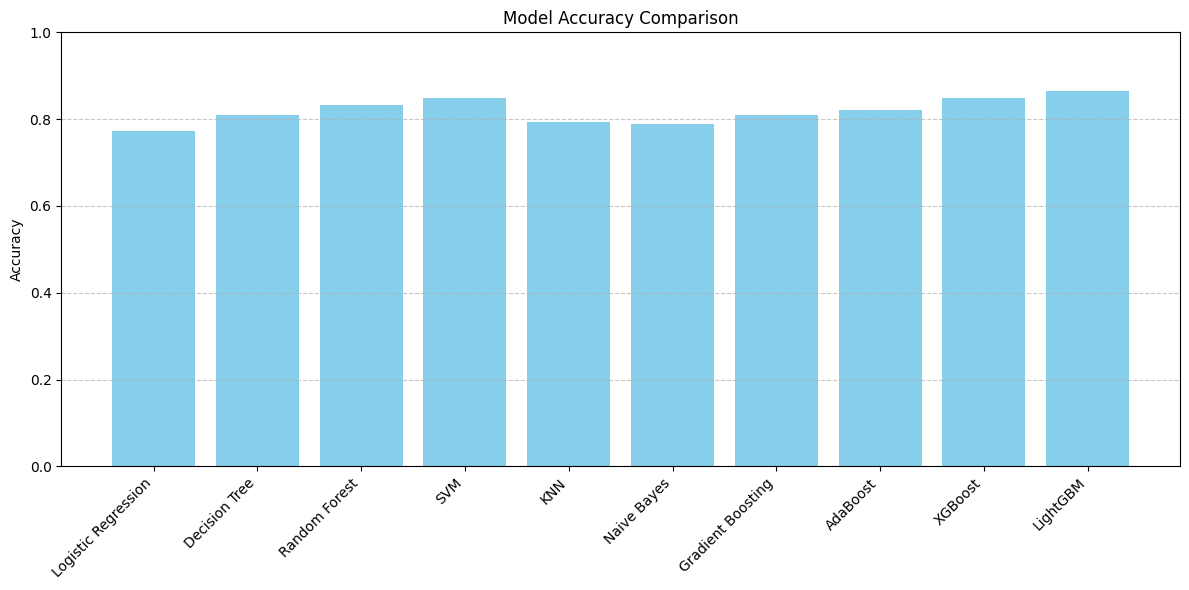

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_scores[name] = acc
    print(f"{name}: {acc:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
